In [1]:
import pandas as pd

df = pd.read_csv('owid-co2-data.csv')
df.head()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,0.000,0.000,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


In [2]:
#Only include data from 1950 and later
df = df[df['year']>=1950]
df

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,0.000,0.000,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10
5,AFG,Afghanistan,1954,0.106,0.000,0.000,NaN,NaN,NaN,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8151000.0,2.248333e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24011,ZWE,Zimbabwe,2014,11.962,2.838,0.330,12.760,0.798,6.671,0.880,...,4.865,11.24,0.827,6.27,0.461,NaN,NaN,NaN,13587000.0,2.474828e+10
24012,ZWE,Zimbabwe,2015,12.163,1.685,0.202,13.010,0.847,6.966,0.880,...,4.885,11.87,0.859,6.68,0.484,NaN,NaN,NaN,13815000.0,2.503057e+10
24013,ZWE,Zimbabwe,2016,10.807,-11.146,-1.356,11.809,1.001,9.264,0.770,...,4.703,11.92,0.850,6.55,0.467,NaN,NaN,NaN,14030000.0,2.515176e+10
24014,ZWE,Zimbabwe,2017,12.026,11.274,1.218,12.531,0.505,4.198,0.845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14237000.0,NaN


In [3]:
#Drop columns with >8K null values (50% of data)
df.dropna(axis=1,thresh=8000, inplace=True)
df.shape

(16008, 19)

In [4]:
#Drop continents, identified by lacking an ISO code
df.dropna(axis=0,subset=['iso_code'],inplace=True)


# FIX THIS:

In [5]:
#Drop "World" entries
df.drop(df['country']=='World', axis=0)


KeyError: '[False False False ... False False False] not found in axis'

In [6]:
pd.set_option('display.max_rows', None)

#Explore mean population of each country
df.groupby(['country'])['population'].mean().sort_values(ascending=False)


country
World                               4.886505e+09
China                               1.033869e+09
India                               8.049598e+08
United States                       2.422070e+08
Indonesia                           1.620234e+08
Russia                              1.392637e+08
Brazil                              1.321568e+08
Japan                               1.142847e+08
Pakistan                            1.022124e+08
Bangladesh                          1.016876e+08
Nigeria                             9.273581e+07
Germany                             7.820858e+07
Mexico                              7.450413e+07
Vietnam                             5.997549e+07
United Kingdom                      5.720926e+07
Philippines                         5.675283e+07
Italy                               5.515397e+07
France                              5.438645e+07
Egypt                               5.191981e+07
Turkey                              4.885304e+07
Ethiopia    

In [7]:
#Explore mean co2 emissions of each country

df.groupby(['country'])['co2'].mean().sort_values(ascending=False)


country
World                               20087.983319
United States                        4572.443145
China                                3020.410884
Russia                               1678.672633
Germany                               907.555435
Japan                                 862.353855
India                                 711.136391
United Kingdom                        562.317333
Ukraine                               431.599350
Canada                                408.196348
France                                380.734435
Italy                                 323.503725
Poland                                315.624159
South Africa                          273.030304
Mexico                                263.238609
Australia                             239.099464
South Korea                           239.019536
Iran                                  238.637420
Brazil                                208.254638
Saudi Arabia                          207.846739
Spain       

In [13]:
#Explore mean co2 emissions per capita of each country

df.groupby(['country'])['co2_per_capita'].mean().sort_values(ascending=False)


country
Sint Maarten (Dutch part)           92.615050
Curacao                             49.015633
Qatar                               46.791232
Falkland Islands                    35.350778
Bonaire Sint Eustatius and Saba     31.217433
United Arab Emirates                30.011817
Luxembourg                          28.195783
Kuwait                              24.740957
Bahrain                             18.743435
United States                       18.724638
Brunei                              18.465507
Trinidad and Tobago                 15.626957
Canada                              15.462029
Australia                           14.076362
Estonia                             13.931867
Czechia                             13.753167
Aruba                               13.578400
Kazakhstan                          12.663317
New Caledonia                       12.293667
Russia                              11.986833
Germany                             11.590768
Belgium                   

In [9]:
#Top 50 countries by co2 emissions (per capita?)
df_top50 = df[df['']]

KeyError: ''

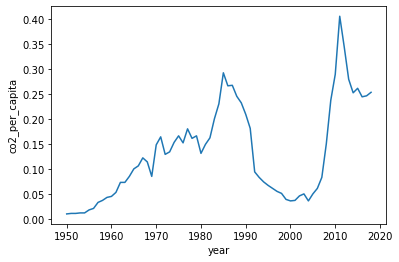

In [10]:
import seaborn as sns

sns.lineplot(data = df[df['country']=='Afghanistan'], x = 'year', y = 'co2_per_capita')

KeyboardInterrupt: 

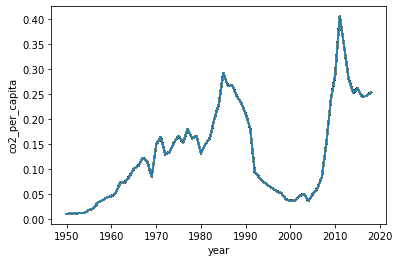

In [11]:
for country in df['country']:
    sns.lineplot(data = df[df['country']=='Afghanistan'], x = 'year', y = 'co2_per_capita')

In [ ]:
#choose top 50 countries by co2 emissions (not per capita)
#time series based on co2 emissions (not per capita)
#observe per capita data via visualizations

**Tuesday**

-Initial time series model (check for stationarity/trends, fix if not)--top 10 countries (not per capita)

-Vizualizations for top 10 countries per capita

**Wednesday**

-Fix whatever needs fixing

-Other EDA/visualizations

-Tune final model

**Thursday**

-Tune final model (if not done by Wed)

-Create Read Me, PPT presentation

-Clean up code

-Practice presentation

**Stretch Goals**

-Research peaks and valleys historically

-Compare to world emissions
